# Collaborative Filtering Based Book Recommender System

In [ ]:
# Importing necessary libraries
import numpy as np    # NumPy for numerical computations
import pandas as pd   # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt   # Matplotlib for data visualization
import seaborn as sns   # Seaborn for statistical data visualization
from sklearn.metrics.pairwise import cosine_similarity #to find similarity in n dimensions

In [ ]:
# Loading the 'Books.csv' dataset into a pandas DataFrame
books = pd.read_csv('/kaggle/input/book-recommendation-dataset/Books.csv')

# Loading the 'Users.csv' dataset into a pandas DataFrame
users = pd.read_csv('/kaggle/input/book-recommendation-dataset/Users.csv')

# Loading the 'Ratings.csv' dataset into a pandas DataFrame
ratings = pd.read_csv('/kaggle/input/book-recommendation-dataset/Ratings.csv')

/tmp/ipykernel_21/4127713917.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/kaggle/input/book-recommendation-dataset/Books.csv')


In [ ]:
# Displaying a random sample of 5 rows from the 'books' DataFrame
books.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
256723,0670891533,"How to Behave So Your Children Will, Too!",Sal Severe Ph.D.,2000,Penguin Putnam Books for Young Readers,http://images.amazon.com/images/P/0670891533.0...,http://images.amazon.com/images/P/0670891533.0...,http://images.amazon.com/images/P/0670891533.0...
167970,0425162621,Begin to Exit Here: A Novel of the Wayward Press,John Welter,1998,Berkley Publishing Group,http://images.amazon.com/images/P/0425162621.0...,http://images.amazon.com/images/P/0425162621.0...,http://images.amazon.com/images/P/0425162621.0...
76008,0373971001,Yellow Rain (Worldwide Mystery),Steven Spetz,1989,Worldwide Library,http://images.amazon.com/images/P/0373971001.0...,http://images.amazon.com/images/P/0373971001.0...,http://images.amazon.com/images/P/0373971001.0...
159915,0028635299,The 15-Minute Gourmet : Vegetarian (15-Minute ...,Paulette Mitchell,2000,John Wiley &amp; Sons,http://images.amazon.com/images/P/0028635299.0...,http://images.amazon.com/images/P/0028635299.0...,http://images.amazon.com/images/P/0028635299.0...
236712,0575061197,Inside the Magic Rectangle,Victor Lewis-Smith,1996,V. Gollancz,http://images.amazon.com/images/P/0575061197.0...,http://images.amazon.com/images/P/0575061197.0...,http://images.amazon.com/images/P/0575061197.0...


In [ ]:
# Displaying a random sample of 5 rows from the 'users' DataFrame
users.sample(5)

,User-ID,Location,Age
172435,172436,"elche, alicante, spain",22.0
246702,246703,"madrid, madrid, spain",30.0
108945,108946,"tahoe city, california, usa",51.0
138997,138998,"toronto, ontario, canada",NaN
121120,121121,"sao vicente, rhode island, brazil",22.0


In [ ]:
# Displaying a random sample of 5 rows from the 'ratings' DataFrame
ratings.sample(5)

,User-ID,ISBN,Book-Rating
736732,177690,1551664348,0
1023028,245371,0023381205,0
1108834,266000,074347712X,0
66131,13552,0446601853,0
1130467,271284,0425091058,0


In [ ]:
# Printing the shapes of the DataFrames
print('Books shape:', books.shape)
print('Users shape:', users.shape)
print('Ratings shape:', ratings.shape)

Books shape: (271360, 8)
Users shape: (278858, 3)
Ratings shape: (1149780, 3)


In [ ]:
# Verifying whether data for each variable is according to its dataype or not.
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
# Verifying whether data for each variable is according to its dataype or not.
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
# Verifying whether data for each variable is according to its dataype or not.
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
# Checking for missing values in the 'books' DataFrame
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
# Checking for missing values in the 'users' DataFrame
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
# Checking for missing values in the 'ratings' DataFrame
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
# Checking for duplicate rows in the 'books' DataFrame
books.duplicated().sum()

0

In [ ]:
# Checking for duplicate rows in the 'users' DataFrame
users.duplicated().sum()

0

In [ ]:
# Checking for duplicate rows in the 'ratings' DataFrame
ratings.duplicated().sum()

0

# Exploratory data analysis (EDA)

<Axes: xlabel='Book-Rating', ylabel='count'>

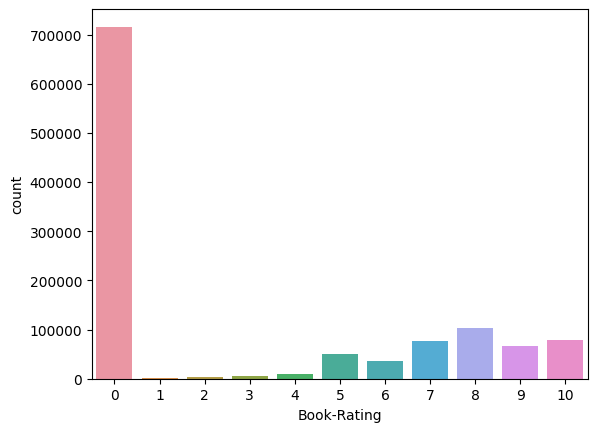

In [ ]:
# Creating a count plot for book ratings.
# It displays the frequency of each unique rating in the 'ratings' DataFrame.
sns.countplot(x=ratings['Book-Rating'])

In [ ]:
# Counting the occurrences of each 'Year-Of-Publication'
books['Year-Of-Publication'].value_counts()

Year-Of-Publication
2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
        ...  
1924        1
2012        1
1927        1
1931        1
2037        1
Name: count, Length: 202, dtype: int64

In [ ]:
# Descriptive statistics for 'Year-Of-Publication'
books['Year-Of-Publication'].describe()

count     271360
unique       202
top         2002
freq       13903
Name: Year-Of-Publication, dtype: int64

In [ ]:
# There is a slight exchange in data in columns - as you can see the Book-Author has the Year-Of-Publication and Publisher has URL, etc
books[books['Year-Of-Publication']=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
# Extracting specific rows from the 'books' DataFrame and rearranging columns

# List of indices to extract
indices = [209538, 221678, 220731]
x = []
y = []

# Loop to extract specific columns and values
for i in range(len(indices)):
    x.append(books.iloc[indices[i]][2])
    y.append(books.iloc[indices[i]][7])

# Reordering columns using a while loop
i, j = 7, 1
while i > 3:
    index = indices[j]
    books.iloc[index][i] = books.iloc[index][i-1]
    i -= 1
    index += 1

# Updating the 'Book-Title' column with values from 'y'
for i in range(len(indices)):
    books.iloc[indices[i]][2] = y[i]

# Updating the 'Book-Author' column with values from 'x'
for i in range(len(indices)):
    books.iloc[indices[i]][3] = x[i]

In [ ]:
books[books['Year-Of-Publication']=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [ ]:
books[books['Year-Of-Publication']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [ ]:
# Descriptive statistics for 'Year-Of-Publication'
books['Year-Of-Publication'].describe()

count     271360
unique       200
top         2002
freq       13903
Name: Year-Of-Publication, dtype: int64

In [ ]:
# The 'Year-Of-Publication' had some years in str format, this is to convert them to int
books.iloc[:, 3] = books.iloc[:, 3].apply(int)

In [ ]:
#There exists data which is Published after 2023, which is invalid
books = books[ books['Year-Of-Publication'] <= 2023 ]
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
books['Year-Of-Publication'].describe()

count     271347
unique       110
top         2002
freq       17627
Name: Year-Of-Publication, dtype: int64

In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            5
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            2
dtype: int64

In [ ]:
books['Publisher'].value_counts()

Publisher
Harlequin                  7535
Silhouette                 4220
Pocket                     3905
Ballantine Books           3783
Bantam Books               3646
                           ... 
Polaris Books                 1
Hannover House                1
Amber Quill Press, LLC.       1
Lunchbox Press                1
Connaught                     1
Name: count, Length: 16806, dtype: int64

In [ ]:
books['Publisher'].describe()

count        271345
unique        16806
top       Harlequin
freq           7535
Name: Publisher, dtype: object

In [ ]:
users.sample(5)

,User-ID,Location,Age
72313,72314,"brooklyn, new york, usa",22.0
272103,272104,"amsterdam, nord holland, netherlands",26.0
13526,13527,"bergamo, lombardia, italy",NaN
53733,53734,"verona, veneto, italy",NaN
88355,88356,"rotterdam, zuid-holland, netherlands",NaN


In [ ]:
ratings.sample(5)

,User-ID,ISBN,Book-Rating
17099,2977,0684810387,0
130919,30276,156054175X,9
993084,238625,340412846X,0
565546,135831,0743237188,0
375266,90217,0345426800,7


In [ ]:
# Merging the 'ratings' and 'books' DataFrames on the 'ISBN' column
ratings_and_books = ratings.merge(books, on="ISBN")

In [ ]:
ratings_and_books.shape

(1031082, 10)

In [ ]:
ratings_and_books.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


# In this Dataset, we will working on the Users who gave more than 200 ratings and books which got at least 50 ratings (Knowledged users and famous books)

In [ ]:
# Finding users who gave than 200 ratings
x = ratings_and_books.groupby('User-ID').count()['Book-Rating'] > 200
reading_users = x[x].index

In [ ]:
# This code filters ratings_and_books DataFrame to include only User-IDs present in the 'reading_users' list.
# The result is stored in 'filtered_rating' variable.
filtered_rating = ratings_and_books[ratings_and_books['User-ID'].isin(reading_users)]

In [ ]:
# Finding books which got more 50 ratings
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] > 50
nice_books = y[y].index

In [ ]:
# This code filters 'ratings_and_books' DataFrame to include only rows where 'Book-Title' matches titles in 'nice_books'.
# The result is stored in 'final_books' variable.
final_books = ratings_and_books[ratings_and_books['Book-Title'].isin(nice_books)]

In [ ]:
final_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
62,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
64,638,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1027869,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028723,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029016,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...
1030309,274808,0449701913,0,Homecoming,Cynthia Voigt,1983,Fawcett Books,http://images.amazon.com/images/P/0449701913.0...,http://images.amazon.com/images/P/0449701913.0...,http://images.amazon.com/images/P/0449701913.0...


In [ ]:
final_books.shape

(154153, 10)

In [ ]:
# Create a Pivot Table
pt = final_books.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

In [ ]:
# fill the NaN values with 0
pt.fillna(0,inplace=True)
pt

User-ID,8,9,14,16,17,26,32,39,42,44,...,278807,278813,278824,278828,278832,278836,278843,278844,278846,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Calculate Similarity Scores using Cosine Similarity
# This computes the similarity between books based on user ratings using the cosine similarity metric.
similarity_scores = cosine_similarity(pt)

In [ ]:
# Defining a Recommendation Function
# This function takes a book name as input and recommends similar books based on user ratings.

def recommend(book_name):
    # Find the index of the book in the pivot table
    index = np.where(pt.index == book_name)[0][0]

    # Retrieve similarity scores for the selected book
    distance = similarity_scores[index]

    # Find the indices and similarity scores of the most similar books
    similar_list = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]

    # Print the recommended books
    for i in similar_list:
        print(pt.index[i[0]])

In [ ]:
recommend('Zoya')

Fine Things
Message from Nam
No Greater Love
Kaleidoscope
Heartbeat
